In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
cf.go_offline()


# WINE REVIEWS 
- Let's EXPLORE our DATA

In [2]:
df = pd.read_csv('../data/winemag-data_first150k.csv')

df.head() 

Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

- Need to DROP unnecesary columns.

In [3]:
df = df.drop(["Unnamed: 0", "region_2"], axis = 1)

#Analize columns and types

print(df.columns) 
print(df.dtypes)

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'variety', 'winery'],
      dtype='object')
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
variety         object
winery          object
dtype: object


# Define numeric values by country.

In [4]:
by_country = df.groupby(['country'])['price', 'points'].sum()


In [5]:
by_country.iplot(kind = 'bar')

# Use a histogram to visualize the mean of the prices

In [6]:

price_mean = df.groupby(['price']).mean()

price_mean.iplot(kind = 'hist')

# By Country, visualize the sum of the points.

In [7]:

df.pivot_table(
    index = ['country'],
    values = 'points',
    aggfunc = 'sum'
).iplot(kind = 'bar')


# Visualize the relationship between the variety of the wine, country and price.

In [8]:

df.iplot(
    x = 'country',
    y = 'price',
    categories = 'variety',
    xTitle = 'Country',
    yTitle = 'Price'
)


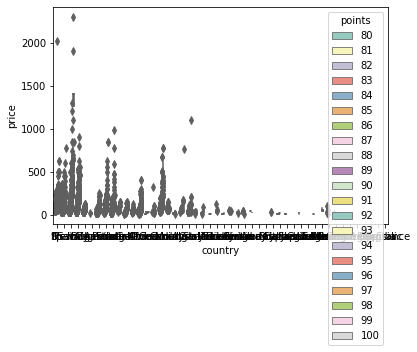

In [9]:
# DF.GROUPBUY(['VARIETY'])

# df.groupby(['variety']).plot(kind = 'scatter')
sns.boxplot(x="country", y="price", hue="points",data=df, palette="Set3")


# Visualize a matrix that compares the prices and the points 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c28e34908>,
      dtype=object)

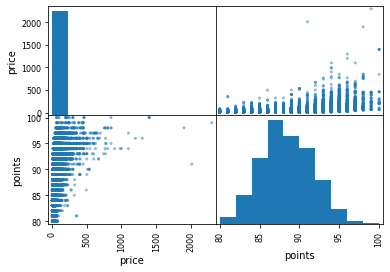

In [10]:
pd.plotting.scatter_matrix(df[['price', 'points']])

# Best Wineries 

In [11]:
best_wineries = df.groupby(['winery', 'country'])['points'].mean().nlargest(10).reset_index()
best_wineries


winery    country      points
0                         Sloan         US  100.000000
1  Mascarello Giuseppe e Figlio      Italy   99.000000
2          Domaine des Lambrays     France   98.000000
3               Château Climens     France   97.111111
4                     Au Sommet         US   97.000000
5                     Cardinale         US   97.000000
6                       Gandona         US   97.000000
7                          Ovid         US   97.000000
8                      Standish  Australia   97.000000
9               Château d'Yquem     France   96.875000

In [22]:
import plotly.graph_objects as go

labels = list(best_wineries['country'].unique())
sub_values = best_wineries.groupby('country')['points'].mean()
values = list(sub_values)
values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()